# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


*  apply  Leave - one - out  method 
*  tune the hyperparameters of the MLP Classifier.

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/23FEB/loo.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

The MNIST dataset contains :

1. 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. 

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.


### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## AI / ML Technique

#### Leave One Out

Leave One Out is a special form of Cross-Validation. In this method each sample is used once as a test set while the remaining samples for the training set. A generalization error estimate is obtained by repeating this procedure for each of the training points available, averaging the results.

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook  
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U3W14_25_Leaveoneout_B" #name of the notebook
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing the packages

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset from sklearn package </br>

NOTE: We are using only 3 classes because Leave-one-out training would take a huge time if all the 10 classes were considered

In [4]:
# Loading the dataset (n_class variable defines the number of classes to choose)
digits = datasets.load_digits(n_class=3)

# Storing the data in 'X'
X = digits.data
# Storing the target data into 'y'
y = digits.target

In [5]:
# Checking for the shape of 'X'
X.shape

(537, 64)

### Leave-one-out Cross-Validation from Sklearn 

In Leave-one-out Cross-Validation the data is partitioned into blocks representing each with 1 record as test while remaining as train. Each and every record is treated as test and those many iterations to evaluate on each.

In [6]:
# Creating the LeaveOneOut object
loo = LeaveOneOut()

# YOUR CODE HERE : use get_n_splits method in "LeaveOneOut" class (above), to get n splits of the dataset 'X'
loo.get_n_splits(X)

537

### Defining Hyper parameters of MLP

In [7]:
# Activation functions
a = ["identity","logistic","tanh","relu"]

# Solvers (Optimizers)
s = ["lbfgs","sgd","adam"]

# Learning rate
lr = [0.0001,0.001,0.1]

# Hidden Layers and number of nodes in each layer
h = [(5,2),(3,2),(6,3),(7,2)]

### Apply the MLP Classifier

In [9]:
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a, solver= s, hidden_layer_sizes= h, learning_rate_init= lr) # YOUR CODE HERE: Create a 'MLPClassifier' (from SkLearn) object by passing the hyper parameter values
    return clf 

def accuracy(actual,predicted):
    return accuracy_score(actual, predicted) # YOUR CODE HERE :Calculate the 'accuarcy_score' (from SkLearn)

### Calculating Training and Testing accuracies 
* The training using LOO below would take 25 mins to complete the execution for obvious reasons. (which is that we are considering each sample as a potential test sample)

In [11]:
test_accuracy = []
train_accuracy = []

for i in range(5):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1], "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3], "\n hidden_layer_sizes = ", h[k4])

    # Calling the mlp function with random hyper paramters
    clf = mlp(a[k1], s[k2], h[k4], lr[k3])

    tempTrain = 0
    tempTest = 0

    for nbrOfSamples,(train_index, test_index) in enumerate(loo.split(X)):

        # Split the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Fit the data into the model
        clf.fit(X_train, Y_train)

        # Predict the values on the fitted model
        predTrain = clf.predict(X_train)

        # Calculating the train accuracy and adding to tempTrain
        tempTrain = tempTrain + accuracy(Y_train, predTrain)
        
        # Predict the values on the fitted model using test data
        predTest = clf.predict(X_test)

        # Calculating the test accuracy and adding to tempTest
        tempTest = tempTest + accuracy(Y_test, predTest)
        
    # Calculating the train accuracy
    print("nbr of samples", nbrOfSamples+1)
    train_accuracy.append(tempTrain*1.0/(nbrOfSamples+1))

    # Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfSamples+1))
    print("===========")
    print("(train,test) accuracy = ", tempTrain*1.0/(nbrOfSamples+1), tempTest*1.0/(nbrOfSamples+1))


Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
nbr of samples 537
(train,test) accuracy =  0.6681223769421059 0.659217877094972

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (7, 2)
nbr of samples 537
(train,test) accuracy =  0.6544199394091001 0.6666666666666666

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
nbr of samples 537
(train,test) accuracy =  0.9999548347647239 0.9962756052141527

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)
nbr of samples 537
(train,test) accuracy =  0.3314711359404119 0.33147113594040967

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
nbr of samples 537
(train,test) accuracy =  0.9998957725339781 0.9962756

#### Plotting the Train and Test Accuracy

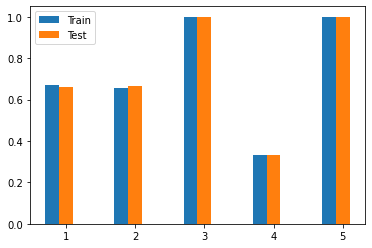

In [12]:
xx = np.array(range(1,6))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

### Please answer the questions below to complete the experiment:

In [13]:
#@title State True or False: The number of test samples in a given iteration, after LOO split, can be greater than 1?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer= "FALSE" #@param ["","TRUE","FALSE"]


In [14]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [15]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [16]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [17]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
